**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   EQUIPO 36
    - Andrea Sánchez Martínez A01795414
    - Juan Carlos Garza Sánchez A00821522
    - Miguel Angel Mayori Vera A01795046
    - Sergio Pulido Morales A01794935

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [3]:
insurance_df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

1b) Búsqueda de valores faltantes.

In [6]:
#Porcentaje de valores faltantes por columna
insurance_df.isnull().sum() / insurance_df.shape[0] * 100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas. 

In [7]:
# Se hace una lista de variables numéricas y otra de categóricas.
num_cols = insurance_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = insurance_df.select_dtypes(exclude=np.number).columns.tolist()

### Variables Cuantitativas

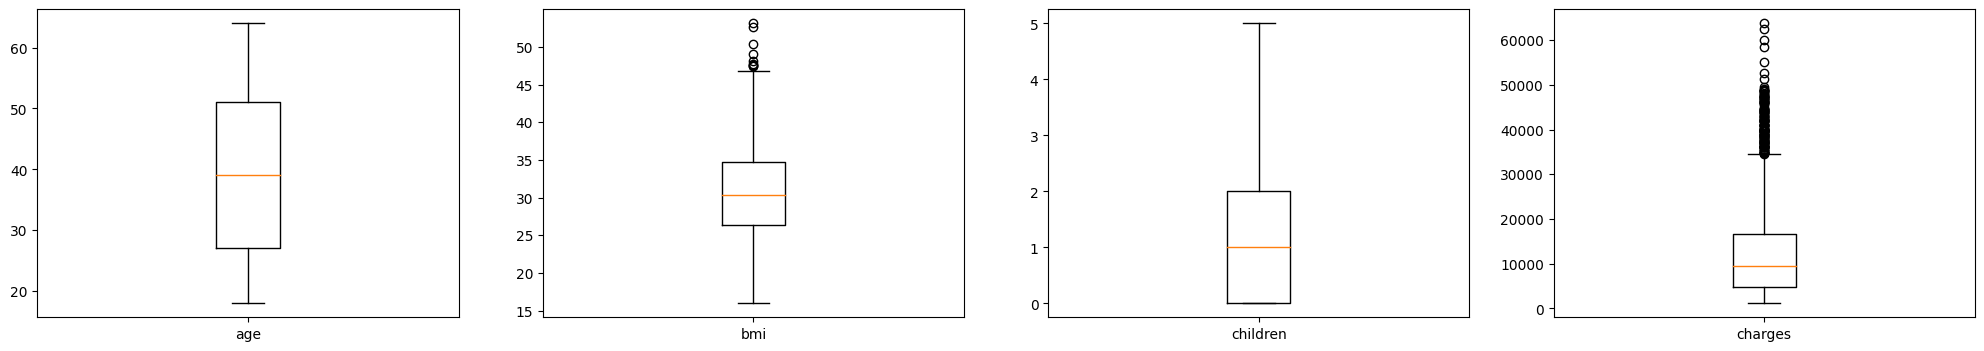

In [8]:
fig, axes = plt.subplots(1,4, figsize=(25,4))
axes = axes.ravel()
for col, ax in zip(insurance_df[num_cols], axes):
  ax.boxplot(insurance_df[col].dropna(), labels=[f'{col}'])

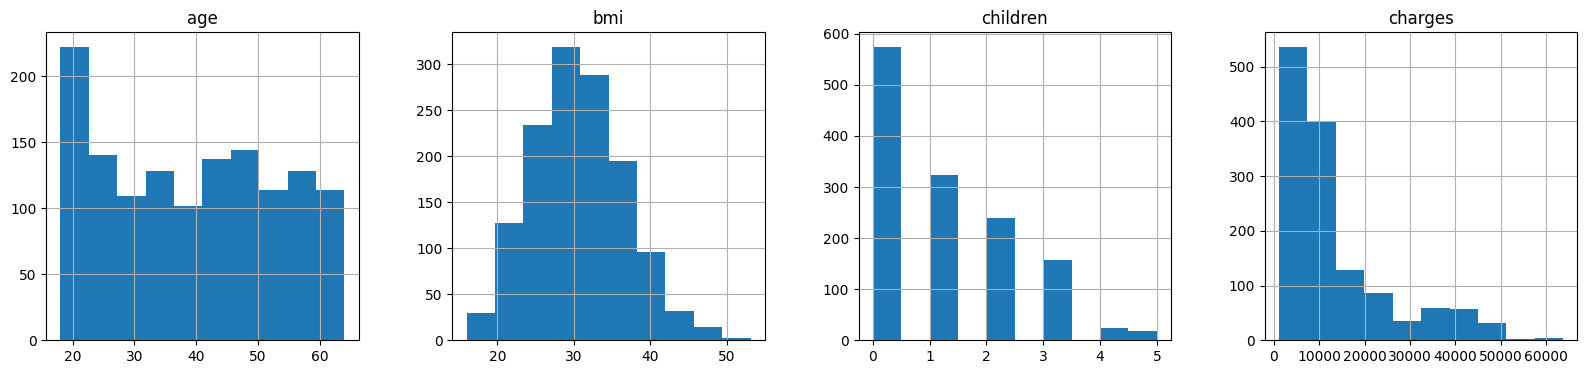

In [9]:
insurance_df.hist(figsize=(25,4), layout=(1,5))
plt.show()

### Variables Cualitativas

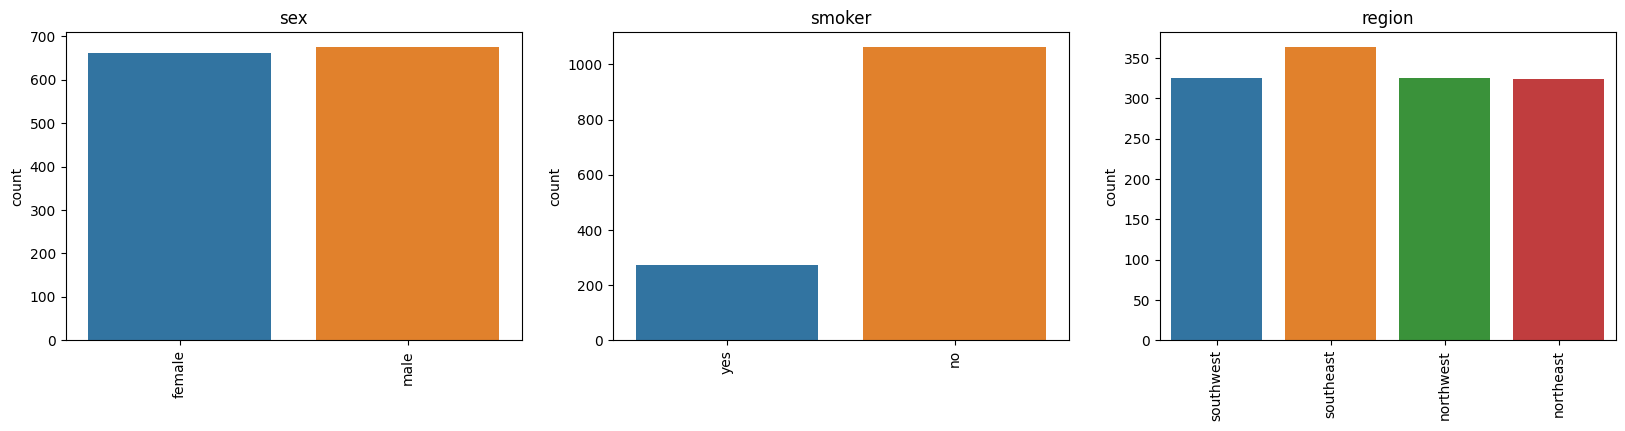

In [10]:
fig, axes = plt.subplots(1,3, figsize=(20,4))
axes = axes.ravel()
for col, ax in zip(insurance_df[cat_cols], axes):
  sns.countplot(x=insurance_df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot. 

**Se puede observar una mayor distribución de cargos/primas en el género masculino**

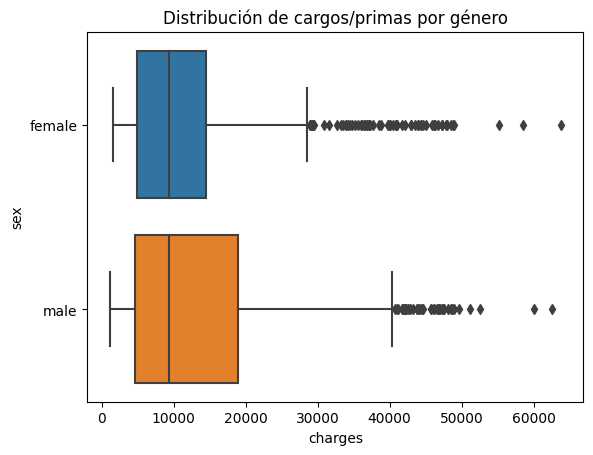

In [11]:
sns.boxplot(y="sex", x="charges", data=insurance_df)
plt.title('Distribución de cargos/primas por género')
plt.show()

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico? 

**Se puede observar que quienes no son fumadores tienen cargos/primas menores a los que sí son fumadores.**

**Es mayor la cardinalidad del grupo de no fumadores**

**Se puede apreciar que los no fumadores son los que tienen maypr numero de hijos.**

**Existe una distribución líneal creciente de la prima segun el BMI de quienes sí son fumadores, es decir, existe una correlación entre BMI y costos/primas para el grupo de fumadores**

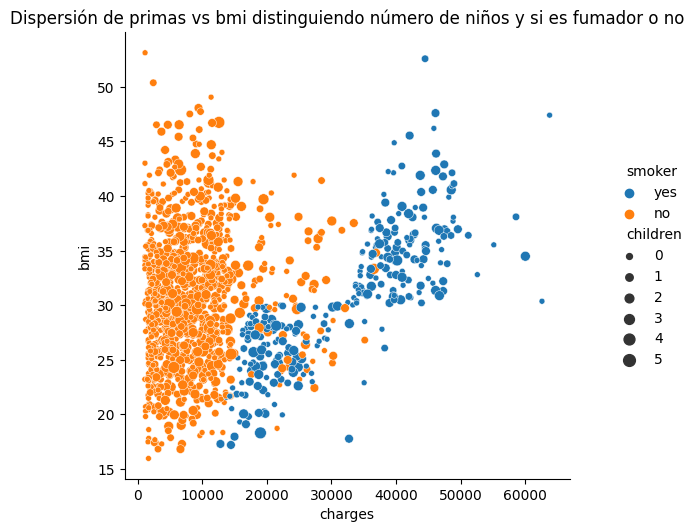

In [12]:
sns.relplot(x="charges", y="bmi", size="children", data=insurance_df, hue="smoker")
plt.title('Dispersión de primas vs bmi distinguiendo número de niños y si es fumador o no')
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas. 

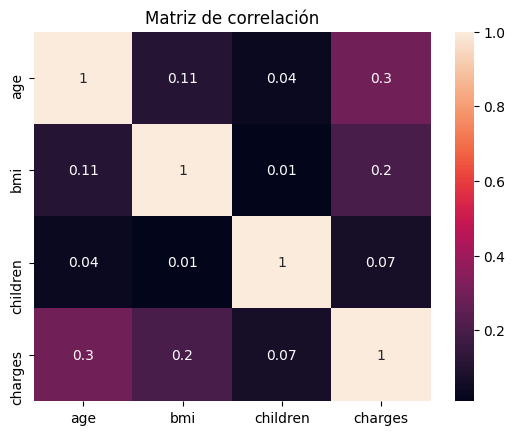

In [13]:
sns.heatmap(round(insurance_df.corr(),2), annot = True)
plt.title('Matriz de correlación')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`. 

3a) ¿Cuál es el promedio de `age` y de `bmi`? 

In [14]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1


lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR


outliers_charges_df = insurance_df[(insurance_df['charges'] < lower_threshold) | (insurance_df['charges'] > upper_threshold)]
outliers_charges_df.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


In [15]:
print(f'Promedio de age: {outliers_charges_df.age.mean()}')
print(f'Promedio de bmi: {outliers_charges_df.bmi.mean()}')

Promedio de age: 41.07913669064748
Promedio de bmi: 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores? 

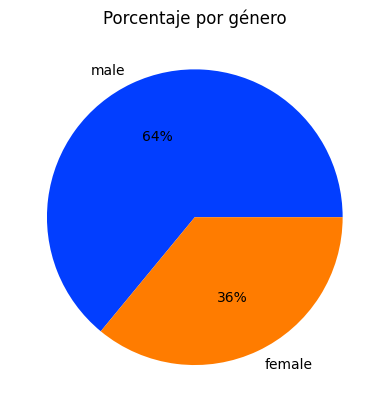

In [16]:
prov_df = outliers_charges_df.sex.value_counts()*100/outliers_charges_df.sex.count()
prov_df.index
colors = sns.color_palette("bright")
plt.pie(prov_df.values, labels=prov_df.index, colors=colors, autopct="%0.0f%%")
plt.title('Porcentaje por género')
plt.show()

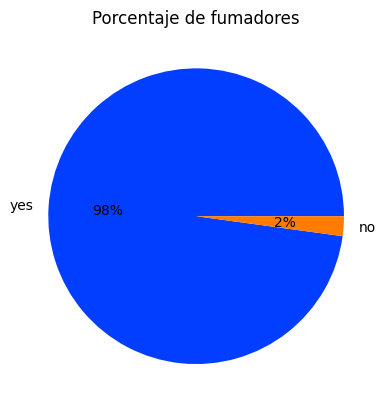

In [17]:
prov_df = outliers_charges_df.smoker.value_counts()*100/outliers_charges_df.smoker.count()
prov_df.index
colors = sns.color_palette("bright")
plt.pie(prov_df.values, labels=prov_df.index, colors=colors, autopct="%0.0f%%")
plt.title('Porcentaje de fumadores')
plt.show()

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`). 

In [18]:
X = insurance_df.drop('charges', axis = 1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción. 

In [19]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)

In [20]:
print("Dimensiones del conjunto de entrenamiento (Xtrain, ytrain):", Xtrain.shape, ytrain.shape)
print("Dimensiones del conjunto de prueba (Xtest, ytest):", Xtest.shape, ytest.shape)

Dimensiones del conjunto de entrenamiento (Xtrain, ytrain): (1070, 6) (1070,)
Dimensiones del conjunto de prueba (Xtest, ytest): (268, 6) (268,)


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector

In [22]:
preprocessing = make_column_transformer(
    (MinMaxScaler(feature_range=(-1, 1)), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_include=object)),
)

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`. 

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)
predictions = lr_model.predict(Xtest)

print('El Root Mean Square Error (RMSE) :', mean_squared_error(ytest, predictions, squared=False))
print('El R square (R2) :', r2_score(ytest, predictions))

El Root Mean Square Error (RMSE) : 5956.454717976425
El R square (R2) : 0.7623311844057113


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`. 


In [25]:
upper_cap = Q3+IQR*1.5

ytrain.loc[ytrain > upper_cap] = upper_cap
ytest.loc[ytest > upper_cap] = upper_cap

In [26]:
lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(Xtrain, ytrain)
predictions = lr_model2.predict(Xtest)

print('El Root Mean Square Error (RMSE) :', mean_squared_error(ytest, predictions, squared=False))
print('El R square (R2) :', r2_score(ytest, predictions))

El Root Mean Square Error (RMSE) : 4913.809383447608
El R square (R2) : 0.7611898810108253


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`. 

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [27]:
preprocessing2 = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OrdinalEncoder(), make_column_selector(dtype_include=object)),
)

In [28]:
lr_model3 = make_pipeline(preprocessing2, LinearRegression())
lr_model3.fit(Xtrain, ytrain)
predictions = lr_model3.predict(Xtest)

print('El Root Mean Square Error (RMSE) :', mean_squared_error(ytest, predictions, squared=False))
print('El R square (R2) :', r2_score(ytest, predictions))

El Root Mean Square Error (RMSE) : 4909.30162164652
El R square (R2) : 0.7616278326187367


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [29]:
lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
lr_model4.fit(Xtrain, ytrain)

insurance_predictions = lr_model4.predict(Xtest)

print('El Root Mean Square Error (RMSE) :', mean_squared_error(ytest, insurance_predictions, squared=False))
print('El R square (R2) :', r2_score(ytest, insurance_predictions))

El Root Mean Square Error (RMSE) : 4263.135740292317
El R square (R2) : 0.8202477081353026
